In [5]:
import sys
from pathlib import Path

cwd = Path.cwd()
lib = cwd.parent
sys.path.append(str(lib))

In [9]:
from dataset import *

In [10]:
DATA_PATH = Path(lib/'data')

In [63]:
def get_data():
    CSV_PATH = DATA_PATH/'train_v2.csv'
    IMG_FOLDER = DATA_PATH/'train-jpg'
    EXT = 'jpg'
    BS = 10

    transform = transforms.Compose([
        transforms.Resize(64),
        transforms.ToTensor()
    ])

    train_ds = PlanetDataset(CSV_PATH/'train.csv', IMG_FOLDER, EXT, transform)
    val_ds = PlanetDataset(CSV_PATH/'val.csv', IMG_FOLDER, EXT, transform, val=True)
    train_dl = DataLoader(train_ds, batch_size=BS, shuffle=True, drop_last=True)
    val_dl = DataLoader(val_ds, batch_size=BS * 2, shuffle=False, drop_last=True)
    
    return (train_dl, val_dl)

In [64]:
train_dl, val_dl = get_data()

In [70]:
mean = 0.
std = 0.
nb_samples = 0.
for data, _ in train_dl:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    print(data.mean(2).sum(0), data.std(2).sum(0))
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

tensor([3.0522, 3.3146, 2.8376]) tensor([0.6383, 0.4943, 0.4148])
tensor([3.4569, 3.6686, 3.1702]) tensor([0.5750, 0.4512, 0.3799])
tensor([2.8255, 3.1207, 2.7113]) tensor([0.4726, 0.3646, 0.2989])
tensor([3.2727, 3.5299, 3.1198]) tensor([0.4724, 0.3894, 0.3257])
tensor([3.2972, 3.3317, 2.7403]) tensor([0.3848, 0.3383, 0.2804])
tensor([2.9686, 3.3306, 2.9704]) tensor([0.3336, 0.2853, 0.2296])
tensor([3.3448, 3.6691, 3.2785]) tensor([0.5588, 0.4527, 0.4054])
tensor([4.1772, 4.4129, 3.9873]) tensor([0.7788, 0.6283, 0.5484])
tensor([3.9388, 4.1669, 3.8010]) tensor([0.5638, 0.4289, 0.4347])
tensor([2.9417, 3.1874, 2.7953]) tensor([0.4579, 0.3495, 0.2649])
tensor([3.3326, 3.6108, 3.2448]) tensor([0.4183, 0.3053, 0.2342])
tensor([2.9089, 3.2688, 2.8236]) tensor([0.3956, 0.3077, 0.2469])
tensor([3.3755, 3.5785, 3.1426]) tensor([0.7732, 0.5480, 0.4324])
tensor([3.0256, 3.2849, 2.8393]) tensor([0.5146, 0.3709, 0.2680])
tensor([3.9646, 4.0757, 3.5011]) tensor([0.6070, 0.4911, 0.4148])
tensor([3.

In [77]:
data.mean(2).sum(0) / 20

tensor([0.1325, 0.1531, 0.1336])

In [75]:
data.mean(2).sum(0) / 20

tensor([0.1325, 0.1531, 0.1336])

In [68]:
mean, std

(tensor([0.3098, 0.3394, 0.2985]), tensor([0.0474, 0.0374, 0.0306]))

In [ ]:
nb_samples = len(train_dl) * BS

In [ ]:
mean /= nb_samples
std /= nb_samples

In [ ]:
mean, std

#### Check how the images look after normalization

In [85]:
def get_data():
    CSV_PATH = DATA_PATH/'train_v2.csv'
    IMG_FOLDER = DATA_PATH/'train-jpg'
    EXT = 'jpg'
    BS = 10
    MEAN, STD = np.array([0.3098, 0.3394, 0.2985]), np.array([0.0474, 0.0374, 0.0306])

    transform = transforms.Compose([
        transforms.Resize(64),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    train_ds = PlanetDataset(CSV_PATH/'train.csv', IMG_FOLDER, EXT, transform)
    val_ds = PlanetDataset(CSV_PATH/'val.csv', IMG_FOLDER, EXT, transform, val=True)
    train_dl = DataLoader(train_ds, batch_size=BS, shuffle=True, drop_last=True)
    val_dl = DataLoader(val_ds, batch_size=BS * 2, shuffle=False, drop_last=True)
    
    return (train_dl, val_dl)

In [86]:
train_dl, val_dl = get_data()

In [87]:
sample = next(iter(val_dl))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


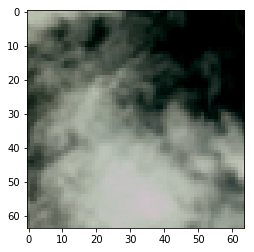

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(sample[0][3].permute(2, 1, 0).numpy())

In [31]:
sample[0][1]

tensor([[[0.7059, 0.7059, 0.7059,  ..., 0.7137, 0.7137, 0.7137],
         [0.7059, 0.7059, 0.7098,  ..., 0.7137, 0.7137, 0.7137],
         [0.7098, 0.7098, 0.7098,  ..., 0.7137, 0.7137, 0.7176],
         ...,
         [0.7137, 0.7137, 0.7137,  ..., 0.7098, 0.7098, 0.7098],
         [0.7137, 0.7137, 0.7137,  ..., 0.7098, 0.7098, 0.7098],
         [0.7137, 0.7137, 0.7137,  ..., 0.7098, 0.7098, 0.7098]],

        [[0.6196, 0.6196, 0.6196,  ..., 0.6196, 0.6196, 0.6196],
         [0.6196, 0.6196, 0.6196,  ..., 0.6196, 0.6196, 0.6196],
         [0.6157, 0.6157, 0.6196,  ..., 0.6196, 0.6196, 0.6196],
         ...,
         [0.6235, 0.6235, 0.6235,  ..., 0.6196, 0.6196, 0.6196],
         [0.6235, 0.6235, 0.6235,  ..., 0.6157, 0.6118, 0.6196],
         [0.6235, 0.6235, 0.6235,  ..., 0.6157, 0.6118, 0.6196]],

        [[0.5137, 0.5137, 0.5176,  ..., 0.5216, 0.5216, 0.5216],
         [0.5137, 0.5176, 0.5176,  ..., 0.5137, 0.5216, 0.5216],
         [0.5176, 0.5176, 0.5176,  ..., 0.5098, 0.5216, 0.

In [39]:
transforms.Normalize??

In [40]:
data.shape

NameError: name 'data' is not defined

In [54]:
data = next(iter(val_dl))

In [55]:
data = data[0]
data.shape

torch.Size([20, 3, 64, 64])

In [59]:
means = []
stds = []

for i in range(3):
    means.append(data[:, i, :, :].flatten().mean().data)
    stds.append(data[:, i, :, :].flatten().std().data)

In [62]:
means, stds

([tensor(0.3932), tensor(0.3959), tensor(0.3324)],
 [tensor(0.2008), tensor(0.1663), tensor(0.1643)])

    ### Running to see the effect of normalization

In [1]:
from dataset import get_data

In [2]:
_, val_dl = get_data()

In [ ]:
sample = 